In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
well_df=pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Project\ROP Prediction\welldata_NonOutlier.csv")
print("Shape :", well_df.shape)
well_df.head()

Shape : (7293, 9)


,Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %,WH Pressure (KPa),ROP(1 m)
0,25.96,0.0,151.09,3197.35,32.71,4200.22,101.61,-8485.61,17.31
1,26.27,0.0,151.09,3168.46,32.68,4195.60,101.70,-8485.61,18.63
2,26.59,0.0,61.54,3134.26,32.73,4174.82,96.81,-8485.61,5.66
3,26.90,0.0,60.23,3110.61,32.86,4167.89,96.67,-8485.61,11.67
4,27.24,0.0,61.75,3144.74,32.88,4173.26,96.63,-8485.61,120.20


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [28]:
X=well_df.iloc[:,:-1].values
y=well_df.iloc[:, -1].values

In [29]:
X1=well_df.iloc[:, 1:-1].values
y1=well_df.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X1, y1, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:',  X_test.shape,  y_test.shape)
scaleX=StandardScaler()
X_train1=scaleX.fit_transform(X_train)
X_test1=scaleX.transform(X_test)
scaleY=StandardScaler()
y_train1=scaleY.fit_transform(y_train)
y_test1=scaleY.transform(y_test)

Train set: (5834, 7) (5834, 1)
Test set: (1459, 7) (1459, 1)


In [30]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions

In [7]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense , Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [244]:
model1 = Sequential(
    [ 
        Dense(64,  activation  = 'relu'),
        Dense(32, activation  = 'relu'),
        Dense(16, activation  = 'relu'),
        Dense(4, activation  = 'relu'),
        Dense(1,  activation  = 'linear')
    ])

In [245]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [246]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [247]:
history=model1.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback])

Epoch 1/300
183/183 [==============================] - 2s 6ms/step - loss: 0.4295 - mean_squared_error: 0.4295 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 2/300
183/183 [==============================] - 1s 6ms/step - loss: 0.3483 - mean_squared_error: 0.3483 - val_loss: 0.3262 - val_mean_squared_error: 0.3262
Epoch 3/300
183/183 [==============================] - 2s 8ms/step - loss: 0.3275 - mean_squared_error: 0.3275 - val_loss: 0.3070 - val_mean_squared_error: 0.3070
Epoch 4/300
183/183 [==============================] - 1s 6ms/step - loss: 0.3237 - mean_squared_error: 0.3237 - val_loss: 0.3250 - val_mean_squared_error: 0.3250
Epoch 5/300
183/183 [==============================] - 1s 7ms/step - loss: 0.3106 - mean_squared_error: 0.3106 - val_loss: 0.2924 - val_mean_squared_error: 0.2924
Epoch 6/300
183/183 [==============================] - 2s 10ms/step - loss: 0.3043 - mean_squared_error: 0.3043 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 7/300
183/183 [

Epoch 51/300
183/183 [==============================] - 2s 10ms/step - loss: 0.1886 - mean_squared_error: 0.1886 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 52/300
183/183 [==============================] - 2s 9ms/step - loss: 0.1904 - mean_squared_error: 0.1904 - val_loss: 0.1692 - val_mean_squared_error: 0.1692
Epoch 53/300
183/183 [==============================] - 2s 10ms/step - loss: 0.1943 - mean_squared_error: 0.1943 - val_loss: 0.1751 - val_mean_squared_error: 0.1751
Epoch 54/300
183/183 [==============================] - 2s 9ms/step - loss: 0.1842 - mean_squared_error: 0.1842 - val_loss: 0.1725 - val_mean_squared_error: 0.1725
Epoch 55/300
183/183 [==============================] - 2s 10ms/step - loss: 0.1964 - mean_squared_error: 0.1964 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 56/300
183/183 [==============================] - 2s 10ms/step - loss: 0.1746 - mean_squared_error: 0.1746 - val_loss: 0.1714 - val_mean_squared_error: 0.1714
Epoch 57/300

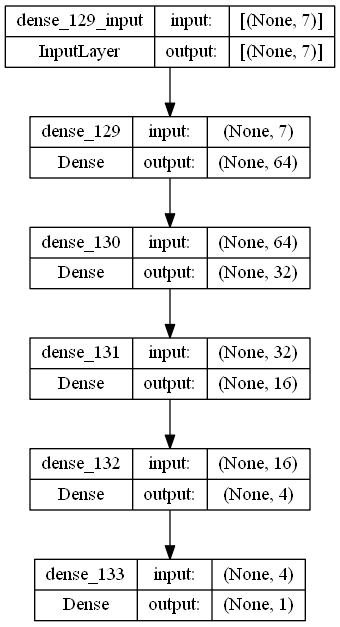

In [248]:
plot_model(model1, "Model 1.png", show_shapes = True)

In [258]:
model1_preds=model1.predict(X_test1)
model1_preds_train=model1.predict(X_train1)

183/183 [==============================] - 0s 2ms/step


In [259]:
mse = tf.keras.losses.MeanSquaredError()
ann_mse=mse(y_test1, model1_preds).numpy()
ann_mse

0.26291683

In [260]:
print('The RMSE score for the ANN model is', np.sqrt(ann_mse))

The RMSE score for the ANN model is 0.51275414


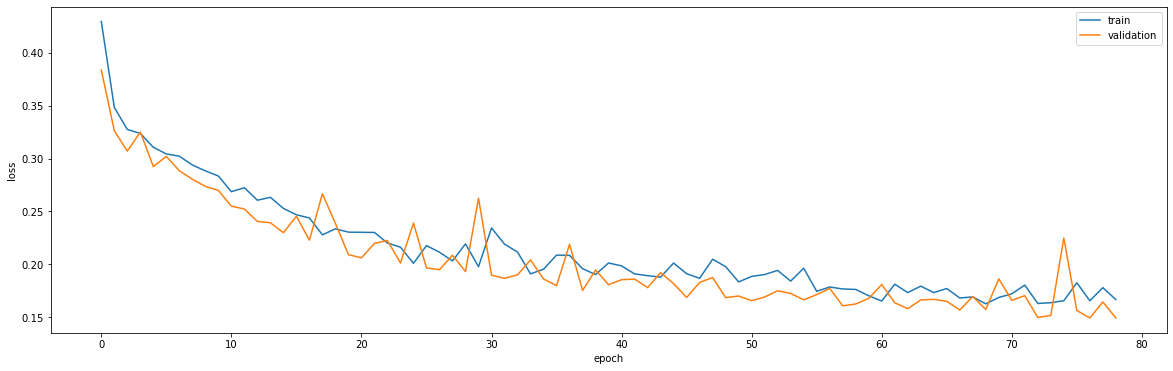

In [261]:
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [262]:
y_test_new= scaleY.inverse_transform(y_test1)
model1_inverse = scaleY.inverse_transform(model1_preds)
model1_predictions=get_preds(y_test_new, model1_inverse)
model1_predictions.head(20)

,Actual,Predicted
0,3.23,2.724949
1,7.69,10.406375
2,10.62,12.721639
3,6.37,6.323186
4,4.79,5.891423
5,8.51,7.269768
6,37.25,37.157005
7,3.94,3.796229
8,5.92,5.745641
9,36.63,69.379242


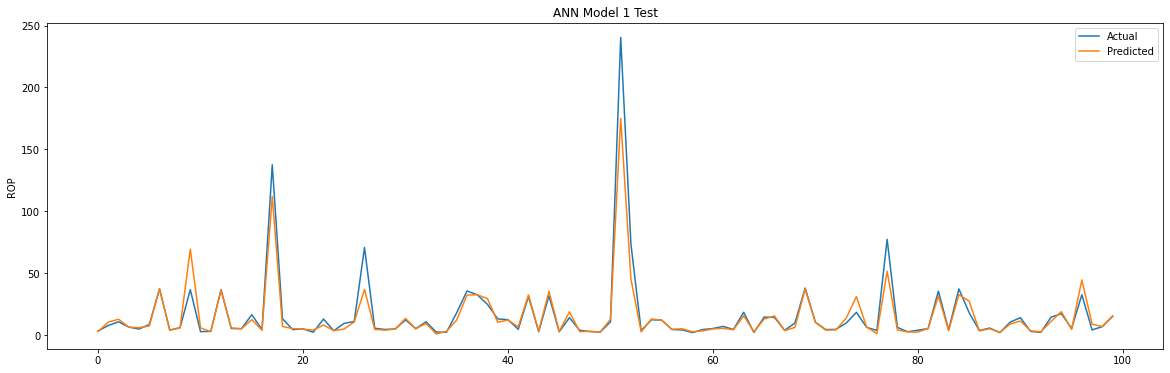

In [301]:
plt.figure(figsize=(20,6))
plt.plot(model1_predictions['Actual'][:100])
plt.plot(model1_predictions['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 1 Test')
plt.show()

In [264]:
print('Test root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test1,model1_preds))))
print('Test Mean absolute error is {}'.format(mean_absolute_error(y_test1,model1_preds)))
print('Test R2 score is {}'.format(r2_score(y_test1,model1_preds)))

Test root mean squared error is 0.5127541622594771
Test Mean absolute error is 0.17098742220142613
Test R2 score is 0.7908209687947941


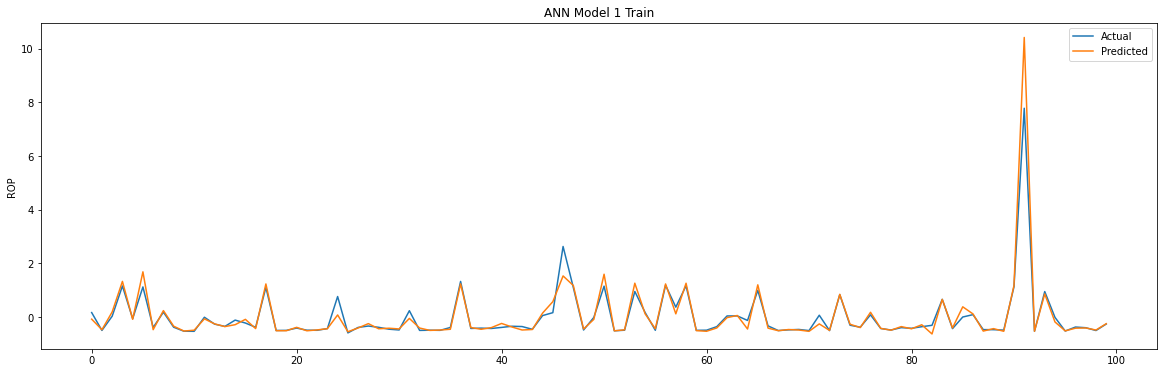

In [303]:
plt.figure(figsize=(20,6))
plt.plot(model1_preds_train[:100])
plt.plot(y_train1[:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 1 Train')
plt.show()

In [265]:
print('Train root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train1,model1_preds_train))))
print('Train Mean absolute error is {}'.format(mean_absolute_error(y_train1,model1_preds_train)))
print('Train R2 score is {}'.format(r2_score(y_train1,model1_preds_train)))

Train root mean squared error is 0.3865359838475482
Train Mean absolute error is 0.14056775130218302
Train R2 score is 0.850589933191008


## Model 2

In [284]:
model2 = Sequential(
    [ 
        Dense(512,  activation  = 'relu'),
        Dense(128, activation  = 'relu'),
        Dense(64, activation  = 'relu'),
        Dense(32, activation  = 'relu'),
        Dense(1,  activation  = 'linear')
    ])
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [285]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [286]:
history2=model2.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback2])

Epoch 1/300
183/183 [==============================] - 2s 7ms/step - loss: 0.3816 - mean_squared_error: 0.3816 - val_loss: 0.4513 - val_mean_squared_error: 0.4513
Epoch 2/300
183/183 [==============================] - 1s 8ms/step - loss: 0.3662 - mean_squared_error: 0.3662 - val_loss: 0.3906 - val_mean_squared_error: 0.3906
Epoch 3/300
183/183 [==============================] - 1s 8ms/step - loss: 0.3329 - mean_squared_error: 0.3329 - val_loss: 0.3005 - val_mean_squared_error: 0.3005
Epoch 4/300
183/183 [==============================] - 1s 7ms/step - loss: 0.3258 - mean_squared_error: 0.3258 - val_loss: 0.4298 - val_mean_squared_error: 0.4298
Epoch 5/300
183/183 [==============================] - 2s 9ms/step - loss: 0.3217 - mean_squared_error: 0.3217 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 6/300
183/183 [==============================] - 2s 9ms/step - loss: 0.2974 - mean_squared_error: 0.2974 - val_loss: 0.2782 - val_mean_squared_error: 0.2782
Epoch 7/300
183/183 [=

Epoch 51/300
183/183 [==============================] - 2s 12ms/step - loss: 0.1746 - mean_squared_error: 0.1746 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 52/300
183/183 [==============================] - 2s 9ms/step - loss: 0.1997 - mean_squared_error: 0.1997 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 53/300
183/183 [==============================] - 2s 12ms/step - loss: 0.2015 - mean_squared_error: 0.2015 - val_loss: 0.1758 - val_mean_squared_error: 0.1758
Epoch 54/300
183/183 [==============================] - 2s 12ms/step - loss: 0.1913 - mean_squared_error: 0.1913 - val_loss: 0.1710 - val_mean_squared_error: 0.1710
Epoch 55/300
183/183 [==============================] - 1s 8ms/step - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.1617 - val_mean_squared_error: 0.1617
Epoch 56/300
183/183 [==============================] - 1s 7ms/step - loss: 0.1832 - mean_squared_error: 0.1832 - val_loss: 0.1650 - val_mean_squared_error: 0.1650
Epoch 57/300


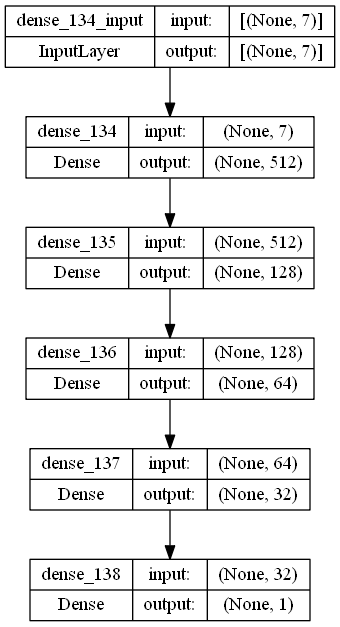

In [287]:
plot_model(model2, "Model 2.png", show_shapes = True)

In [288]:
model2_preds=model2.predict(X_test1)
model2_preds_train=model2.predict(X_train1)

183/183 [==============================] - 1s 3ms/step


In [289]:
model2_mse=mse(y_test1, model2_preds).numpy()
model2_mse

0.3030405

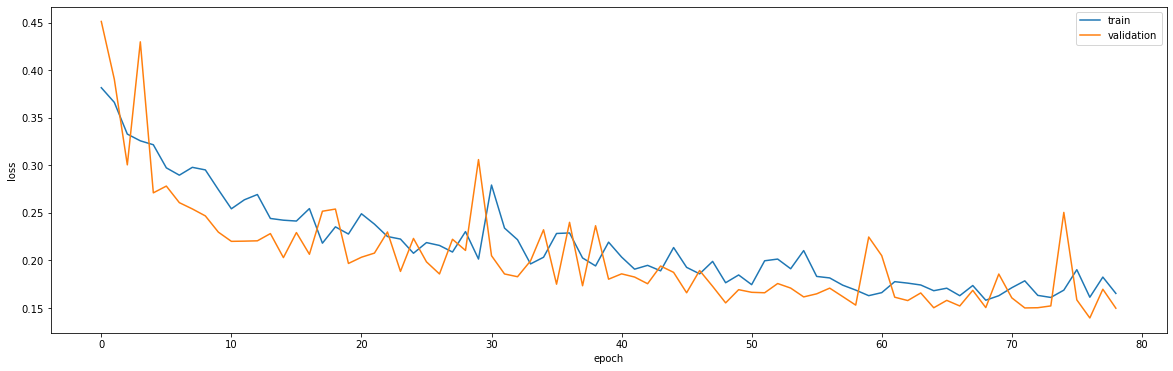

In [290]:
plt.figure(figsize=(20,6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [291]:
y_test_new= scaleY.inverse_transform(y_test1)
model2_inverse = scaleY.inverse_transform(model2_preds)
model2_predictions=get_preds(y_test_new, model2_inverse)
model2_predictions.head()

,Actual,Predicted
0,3.23,3.278594
1,7.69,10.237381
2,10.62,12.242663
3,6.37,9.095332
4,4.79,4.841898


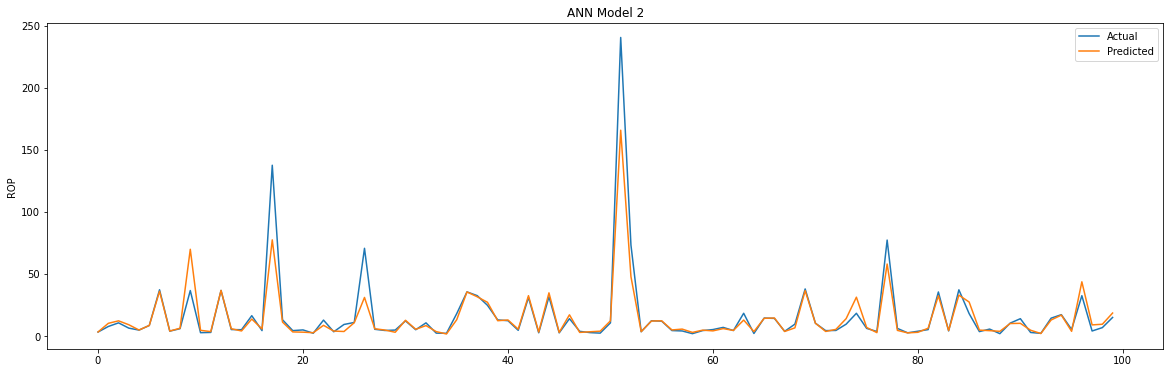

In [305]:
plt.figure(figsize=(20,6))
plt.plot(model2_predictions['Actual'][:100])
plt.plot(model2_predictions['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 2')
plt.show()

In [293]:
print('TEST root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test1,model2_preds))))
print('TEST Mean absolute error is {}'.format(mean_absolute_error(y_test1,model2_preds)))
print('TEST R2 score is {}'.format(r2_score(y_test1,model2_preds)))

TEST root mean squared error is 0.5504911241402076
TEST Mean absolute error is 0.17844772739193052
TEST R2 score is 0.7588982290227088


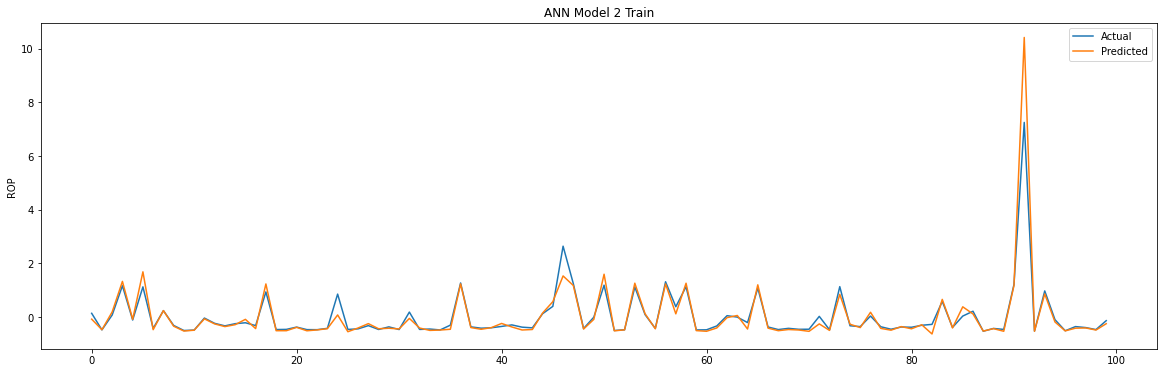

In [307]:
plt.figure(figsize=(20,6))
plt.plot(model2_preds_train[:100])
plt.plot(y_train1[:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 2 Train')
plt.show()

In [295]:
print('Train root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train1,model2_preds_train))))
print('Train Mean absolute error is {}'.format(mean_absolute_error(y_train1,model2_preds_train)))
print('Train R2 score is {}'.format(r2_score(y_train1,model2_preds_train)))

Train root mean squared error is 0.3870728164697155
Train Mean absolute error is 0.13441097171254668
Train R2 score is 0.8501746347502019


## Model 3

In [92]:
model3 = Sequential(
    [ 
        Dense(256,  activation  = 'relu'),
        Dense(128, activation  = 'relu'),
        Dense(32, activation  = 'relu'),
        Dense(16, activation  = 'relu'),
        Dense(1,  activation  = 'linear')
    ])
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [93]:
callback3 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [94]:
history3=model3.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback3])

Epoch 1/300
183/183 [==============================] - 1s 4ms/step - loss: 0.3777 - mean_squared_error: 0.3777 - val_loss: 0.4225 - val_mean_squared_error: 0.4225
Epoch 2/300
183/183 [==============================] - 1s 3ms/step - loss: 0.3598 - mean_squared_error: 0.3598 - val_loss: 0.3610 - val_mean_squared_error: 0.3610
Epoch 3/300
183/183 [==============================] - 1s 3ms/step - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 0.2999 - val_mean_squared_error: 0.2999
Epoch 4/300
183/183 [==============================] - 1s 3ms/step - loss: 0.3239 - mean_squared_error: 0.3239 - val_loss: 0.3929 - val_mean_squared_error: 0.3929
Epoch 5/300
183/183 [==============================] - 1s 3ms/step - loss: 0.3241 - mean_squared_error: 0.3241 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 6/300
183/183 [==============================] - 1s 3ms/step - loss: 0.3027 - mean_squared_error: 0.3027 - val_loss: 0.2845 - val_mean_squared_error: 0.2845
Epoch 7/300
183/183 [=

183/183 [==============================] - 1s 3ms/step - loss: 0.1762 - mean_squared_error: 0.1762 - val_loss: 0.1638 - val_mean_squared_error: 0.1638
Epoch 52/300
183/183 [==============================] - 1s 3ms/step - loss: 0.1993 - mean_squared_error: 0.1993 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 53/300
183/183 [==============================] - 1s 3ms/step - loss: 0.2020 - mean_squared_error: 0.2020 - val_loss: 0.1683 - val_mean_squared_error: 0.1683
Epoch 54/300
183/183 [==============================] - 1s 3ms/step - loss: 0.1866 - mean_squared_error: 0.1866 - val_loss: 0.1729 - val_mean_squared_error: 0.1729
Epoch 55/300
183/183 [==============================] - 1s 3ms/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 56/300
183/183 [==============================] - 1s 3ms/step - loss: 0.1693 - mean_squared_error: 0.1693 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 57/300
183/183 [=======

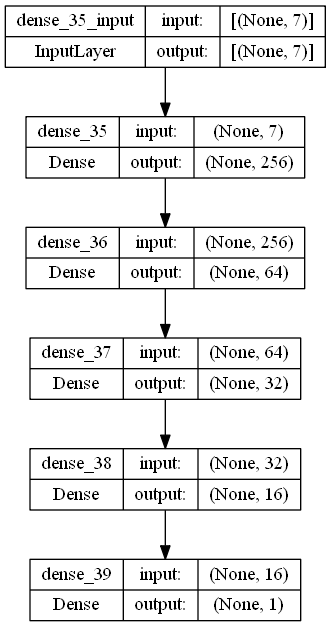

In [84]:
plot_model(model3, "Model 3.png", show_shapes = True)

In [275]:
model3_preds=model3.predict(X_test1)
model3_preds_train=model3.predict(X_train1)

183/183 [==============================] - 1s 3ms/step


In [276]:
model3_mse=mse(y_test1, model3_preds).numpy()
model3_mse

0.25103617

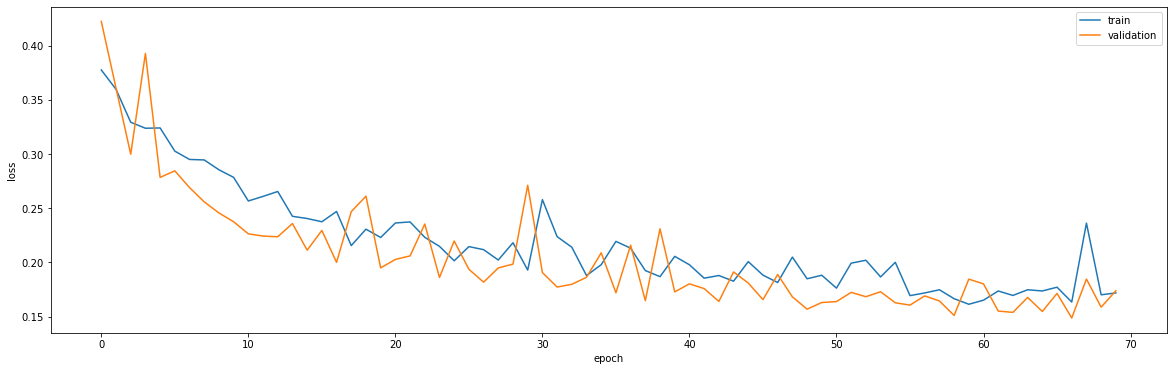

In [277]:
plt.figure(figsize=(20,6))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [279]:
y_test_new= scaleY.inverse_transform(y_test1)
model3_inverse = scaleY.inverse_transform(model3_preds)
model3_predictions=get_preds(y_test_new, model3_inverse)
model3_predictions.head(9)

,Actual,Predicted
0,3.23,3.079745
1,7.69,8.491162
2,10.62,12.315737
3,6.37,9.429853
4,4.79,5.997434
5,8.51,8.721233
6,37.25,33.599968
7,3.94,3.865515
8,5.92,5.554535


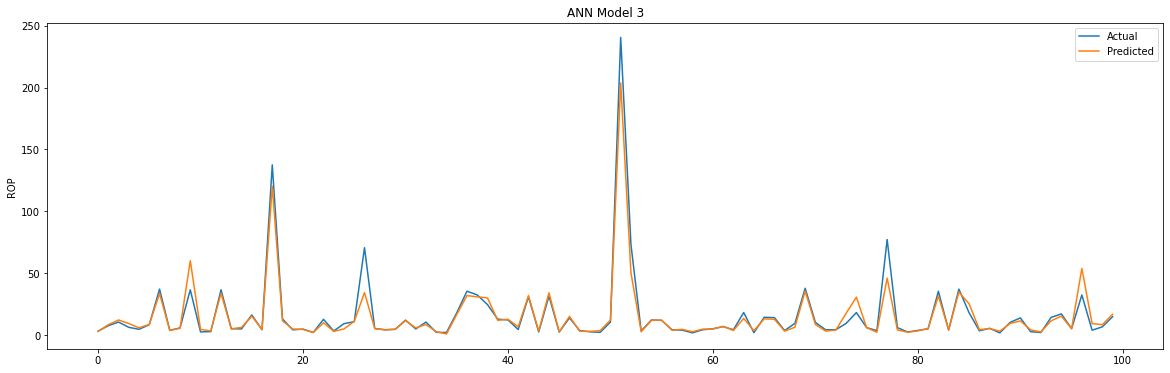

In [309]:
plt.figure(figsize=(20,6))
plt.plot(model3_predictions['Actual'][:100])
plt.plot(model3_predictions['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 3')
plt.show()

In [100]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test1,model3_preds))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test1,model3_preds)))
print('R2 score is {}'.format(r2_score(y_test1,model3_preds)))

root mean squared error is 0.501035116178368
Mean absolute error is 0.16601161089574346
R2 score is 0.8002733170555896


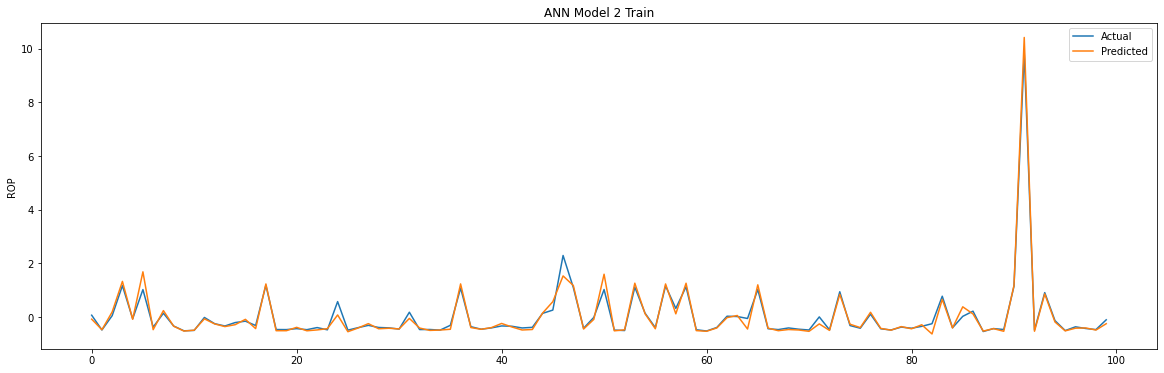

In [311]:
plt.figure(figsize=(20,6))
plt.plot(model3_preds_train[:100])
plt.plot(y_train1[:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN Model 2 Train')
plt.show()

In [281]:
print('Train root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train1,model2_preds_train))))
print('Train Mean absolute error is {}'.format(mean_absolute_error(y_train1,model2_preds_train)))
print('Train R2 score is {}'.format(r2_score(y_train1,model2_preds_train)))

Train root mean squared error is 0.4129210702323657
Train Mean absolute error is 0.13947046514324385
Train R2 score is 0.8294961897581578


## Evaluation Summary

### Train Set

| Model              | R2 Score|   RMSE   |   MAE   |
| ------------------ | ------- | -------- | ------- |
| Model 1            | 0.85    | 0.39     | 0.14    |
| Model 2            | 0.83    | 0.41     | 0.14    |
| Model 3            | 0.83    | 0.39     | 0.14    |


### Test set

| Model              | R2 Score|   RMSE   |   MAE   |
| ------------------ | ------- | -------- | ------- |
| Model 1            | 0.80    | 0.51     | 0.17    |
| Model 2            | 0.75    | 0.55     | 0.18    |
| Model 3            | 0.80    | 0.50     | 0.17    |